In [111]:
from scipy.stats import norm, cauchy, pareto, genpareto, lognorm, gamma 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [112]:
# import numpy as np
# from scipy.stats import weibull_min, norm, cauchy, lognorm
# from tqdm import tqdm

# import numpy as np
# from scipy.stats import cauchy, norm, gamma, weibull_min, gamma,lognorm,genpareto


# def posterior(
#     X,
#     theta,
#     distribution,
#     prior_loc,
#     prior_scale,
#     prior_shape,
#     par_prior_loc,
#     par_prior_scale,
#     par_prior_shape,
#     std_prop_loc,
#     std_prop_scale,
#     std_prop_shape,
#     reparametrization
# ):
#     """Function to sample from the posterior of parameters theta given data X. 
#     """ 
#     # Special Normal/NIG case
#     def post_NIG(X, par_prior_loc, par_prior_scale):
#         mu_0, nu = par_prior_loc
#         scale, beta = par_prior_scale
#         n = len(X)
#         loc = np.random.gamma(
#             shape=scale + n / 2,
#             scale=1
#             / (
#                 beta
#                 + np.sum((X - np.mean(X)) ** 2) / 2
#                 + n * nu * (np.mean(X) - mu_0) ** 2 / (2 * (nu + n))
#             ),
#             size=1,
#         )[0]
#         mu = np.random.normal(
#             loc=(nu * mu_0 + np.sum(X)) / (nu + n),
#             scale=1 / np.sqrt((nu + n) * loc),
#             size=1,
#         )[0]
#         return [mu, 1 / np.sqrt(loc),0]
    
#     if distribution == "normal" and prior_loc == "NIG":
#         return post_NIG(X, par_prior_loc, par_prior_scale)

#     def llike_cauchy(x, loc, scale, shape,reparametrization=False):
#         return np.sum(cauchy.logpdf(x, loc=loc, scale=scale))

#     def llike_normal(x, loc, scale, shap,reparametrization=False):
#         return np.sum(norm.logpdf(x, loc=loc, scale=scale))

#     def llike_weibull(x, loc, scale, shape,reparametrization=False):
#         return np.sum(weibull_min.logpdf(x, c=shape, scale=scale, loc=loc))
#     def llike_lognormal(x,loc,scale,shape,reparametrization=True):
#         if reparametrization: scale,shape = np.log((scale-loc)**2/np.sqrt((scale-loc)**2+shape**2)),np.sqrt(np.log(1+shape**2/(scale-loc)**2))
#         return np.sum(lognorm.logpdf(x,loc=loc,s=shape,scale=np.exp(scale)))
#     def llike_genpareto(x,loc,scale,shape,reparametrization=True):
#         if reparametrization: 
#             scale,shape = (scale-loc)/2+(scale-loc)**3/(2*shape**2),1/2-(scale-loc)**2/(2*shape**2)
#         return np.sum(genpareto.logpdf(x,c=shape,scale=scale,loc=loc))


#     def lprior_normal(x,par_prior):
#         if par_prior[1]<=0:
#             raise Exception(
#                     "ERROR : prior parameter ({}) invalid for cauchy prior!".format(par_prior)
#                 )
#         return norm(loc=par_prior[0], scale=par_prior[1]).logpdf(x)
    
#     def lprior_cauchy(x,par_prior):
#         if par_prior[1]<=0:
#             raise Exception(
#                     "ERROR : prior parameter ({}) invalid for cauchy prior!".format(par_prior)
#                 )
#         return cauchy(loc=par_prior[0], scale=par_prior[1]).logpdf(x)

#     def lprior_gamma(x,par_prior):
#         if par_prior[0] <= 0 or par_prior[1]<=0:
#             raise Exception(
#                     "ERROR : prior parameter ({}) invalid for gamma prior!".format(par_prior)
#                 )
#         return gamma(a=par_prior[0], scale=par_prior[1]).logpdf(x)
    
#     def lprior_jeffreys(x,par_prior):
#         return -np.log(x)
    
    
#     loc, scale, shape = theta
#     if distribution == "normal":
#         llike = llike_normal
#     elif distribution == "cauchy":
#         llike = llike_cauchy
#     elif distribution == "weibull":
#         llike = llike_weibull
#     elif distribution == "TranslatedWeibull":
#         llike = llike_weibull
#     elif distribution == "lognormal" or distribution=="translated_lognormal":
#         llike = llike_lognormal
#     elif distribution == "generalized_pareto":
#         llike = llike_genpareto
        
#     else:
#         raise Exception("ERROR : Distribution {} not valid !".format(distribution))

#     # METROPOLIS HASTINGS STEP FOR LOCATION PARAMETER

#     if distribution != "weibull" and distribution != "lognormal":        
#         if prior_loc == "cauchy":
#             lprior_loc = lprior_cauchy
#         elif prior_loc == "normal":
#             lprior_loc = lprior_normal
#         elif prior_loc == "gamma":
#             lprior_loc = lprior_gamma
            
#         else:
#             raise Exception(
#                 "ERROR : Prior for location {} not valid !".format(prior_loc)
#             )
    

#         loc_star = np.random.normal(loc, std_prop_loc)

#         if not((loc_star >= np.min(X) and (distribution in ["TranslatedWeibull","translated_lognormal","generalized_pareto"]))):
#             current_llike, candidate_llike = llike(X, loc, scale, shape,reparametrization), llike(
#                 X, loc_star, scale, shape,reparametrization
#             )

#             current_lprior, candidate_lprior = lprior_loc(loc,par_prior_loc), lprior_loc(loc_star,par_prior_loc)

#             ratio_acceptation = min(
#                 np.exp(
#                     candidate_llike - current_llike + candidate_lprior - current_lprior
#                 ),
#                 1,
#             )
#             #print("Loc: current = {} (prior = {} like = {}) candidate = {} (prior = {} like = {}) ratio = {}".format(loc,current_lprior,current_llike,loc_star,candidate_lprior,candidate_llike,ratio_acceptation))
#             if np.random.uniform() < ratio_acceptation:
#                 loc = loc_star
                
#     # METROPOLIS HASTINGS STEP FOR SCALE PARAMETER
#     if prior_scale =="normal":
#         lprior_scale = lprior_normal
#     elif prior_scale == "gamma":
#         lprior_scale = lprior_gamma
#     elif prior_scale=="jeffreys":
#         lprior_scale = lprior_jeffreys
        
#     else:
#         raise Exception("ERROR : Prior for scale {} not valid !".format(prior_scale))
#     scale_star = np.random.normal(scale, std_prop_scale)

#     if scale_star > 0:
#         current_llike, candidate_llike = llike(X, loc, scale, shape, reparametrization), llike(
#             X, loc, scale_star, shape, reparametrization
#         )
#         current_lprior, candidate_lprior = lprior_scale(scale,par_prior_scale), lprior_scale(scale_star,par_prior_scale)

#         ratio_acceptation = min(
#             np.exp(candidate_llike - current_llike + candidate_lprior - current_lprior),
#             1,
#         )
#         #print("Scale: current = {} (prior = {} like = {}) candidate = {} (prior = {} like = {}) ratio = {}".format(scale,current_lprior,current_llike,scale_star,candidate_lprior,candidate_llike,ratio_acceptation))
#         if np.random.uniform() < ratio_acceptation:
#             scale = scale_star


#     # METROPOLIS HASTINGS STEP FOR SHAPE PARAMETER

#     if distribution in ["TranslatedWeibull", "weibull","translated_lognormal","lognormal","generalized_pareto"]:
#         if prior_shape == "gamma":
#             lprior_shape = lprior_gamma
#         elif prior_shape == "normal":
#             lprior_shape = lprior_normal
#         elif prior_shape == "jeffreys":
#             lprior_shape = lprior_jeffreys
#         else:
#             raise Exception(
#                 "ERROR : Prior for shape '{}' not valid !".format(prior_shape)
#             )

#         shape_star = np.random.normal(shape, std_prop_shape)

#         if shape_star > -np.inf:
#             current_llike, candidate_llike = llike(X, loc, scale, shape, reparametrization), llike(
#                 X, loc, scale, shape_star, reparametrization
#             )

#             current_lprior, candidate_lprior = lprior_shape(shape,par_prior_shape), lprior_shape(shape_star,par_prior_shape)
        
        
#             ratio_acceptation = min(
#                 np.exp(
#                     candidate_llike - current_llike + candidate_lprior - current_lprior
#                 ),
#                 1,
#             )
#             #print("Shape: current = {} (prior = {} like = {}) candidate = {} (prior = {} like = {}) ratio = {}".format(shape,current_lprior,current_llike,shape_star,candidate_lprior,candidate_llike,ratio_acceptation))
#             if np.random.uniform() < ratio_acceptation:
#                 shape = shape_star
                
#     return [loc, scale, shape]

## truncated

In [113]:
# import numpy as np
# from scipy.stats import norm,truncnorm,weibull_min,cauchy,lognorm,genpareto


# def truncated(loc, scale, shape=1, a=-np.inf, b=np.inf, distribution="normal", size=1,reparametrization=True):
#     """
#     Function to sample from truncated distribution in interval [a,b].
#     """
#     #print("In truncated, theta = {}, {}, {} repar = {}".format(np.unique(loc),np.unique(scale),np.unique(shape),reparametrization))
#     if distribution == "normal":
#         res=truncnorm.rvs(a=(a-loc)/scale, b=(b-loc)/scale, loc=loc, scale=scale, size=size)

#     else:
#         if distribution=="weibull" or distribution=="lognormal":loc=0
#         if distribution in ["TranslatedWeibull","translated_lognormal","generalized_pareto"]:
#             a=np.where(a<=loc,loc,a)
#             b=np.where(b<=loc,loc,b)
#         if distribution == "weibull" or distribution=="TranslatedWeibull":
#             law = weibull_min(c=shape, scale=scale, loc=loc)
#         elif distribution=="generalized_pareto":
#             #print("Avant in truncated",np.unique(loc),np.unique(scale),np.unique(shape))
#             if reparametrization: scale,shape = (scale-loc)/2+(scale-loc)**3/(2*shape**2),1/2-(scale-loc)**2/(2*shape**2)
#             #print("Apres in truncated",np.unique(loc),np.unique(scale),np.unique(shape))
#             law = genpareto(loc=loc,scale=scale,c=shape)
#         elif distribution=="translated_lognormal" or distribution=="lognormal":
#             if reparametrization: scale,shape = np.log((scale-loc)**2/np.sqrt((scale-loc)**2+shape**2)),np.sqrt(np.log(1+shape**2/(scale-loc)**2))
#             law = lognorm(s=shape,scale= np.exp(scale),loc=loc)
#         #print("In truncated, theta = {}, {}, {}".format(np.unique(loc),np.unique(scale),np.unique(shape)))
#         #print("a,b = {}, {}".format(np.unique(a),np.unique(b)))
#         ua,ub =law.cdf(a),law.cdf(b)
#         #print("In truncated: ua= {}\nub = {}".format(np.unique(ua),np.unique(ub)))
#         U = np.random.uniform(low=ua, high=ub, size=size)
#         res = law.ppf(U)
#     return res


# def truncated_2inter(loc, scale, a, b, c, d, shape = 1, distribution="normal",size=1):
#     """
#     Function to sample from truncated distribution in the union of intervals [a,b] and [c,d].
#     """
#     if (a >= b) or (c >= d):
#         print("a = {}, b = {}, c = {},d = {}".format(a, b, c, d))
#     if distribution == "normal":
#         F = norm(loc=loc, scale=scale).cdf
#     elif distribution == "lognormal" or distribution=="translated_lognormal":
#         F = lambda x :  norm.cdf((np.log(x)-loc)/scale)
#     elif distribution == "cauchy":
#         F = cauchy(loc=loc, scale=scale).cdf
#     elif distribution == "TranslatedWeibull" or distribution== "weibull":
#         F= weibull_min(c=shape, scale=scale, loc=loc).cdf
#         if scale<=0: print(loc,scale)
#     elif distribution=="generalized_pareto":
#         F = genpareto(loc=loc,scale=scale,c=shape).cdf
        
        
        
#     if (b - loc) / scale <=  (a - loc) / scale : print((b - loc) / scale ,  (a - loc) / scale)
#     if (
#         F((b - loc) / scale)
#         - F((a - loc) / scale)
#         + F((d - loc) / scale)
#         - F((c - loc) / scale)
#     )<=0: return truncated(
#             a=a,
#             b=b,
#             size=size,
#             loc=loc,
#             scale=scale,
#             distribution=distribution
#         )
    
#     elif np.random.uniform(0, 1, 1) < (
#         F((b - loc) / scale) - F((a - loc) / scale)
#     ) / (
#         F((b - loc) / scale)
#         - F((a - loc) / scale)
#         + F((d - loc) / scale)
#         - F((c - loc) / scale)
#     ):
#         return truncated(
#             a=a,
#             b=b,
#             size=size,
#             loc=loc,
#             scale=scale,
#             distribution=distribution,
#         )
#     else:
#         return truncated(
#             a=c,
#             b=d,
#             size=size,
#             loc=loc,
#             scale=scale,
#             distribution=distribution,
#         )

## Quantile

In [114]:


# def Quantile_Init(Q, P, N, distribution, epsilon=0.001,reparametrization=True):
    
#     loc, scale, shape = 0, 1, 1
#     if distribution == "normal":
#         loc = Q[len(Q) // 2]
#         scale = (Q[-1] - Q[0]) / (norm(loc).ppf(P[-1]) - norm(loc).ppf(P[0]))
#         par_names = ["loc", "scale"]
#     if distribution == "cauchy":
#         loc = Q[len(Q) // 2]
#         scale = (Q[-1] - Q[0]) / (cauchy(loc).ppf(P[-1]) - cauchy(loc).ppf(P[0]))
#         par_names = ["loc", "scale"]
#     if distribution == "TranslatedWeibull" or distribution == "weibull":
#         if distribution == "weibull":
#             loc = 0
#             par_names = ["scale", "shape"]

#         else:
#             loc = 2*Q[0]-Q[1]
#             par_names = ["loc", "scale", "shape"]

#         shape = 1.5
#         scale = (Q[-1] - Q[0]) / (
#             weibull_min(shape, loc=loc).ppf(P[-1])
#             - weibull_min(shape, loc=loc).ppf(P[0])
#         )
#     if distribution == "translated_lognormal" or distribution == "lognormal":
#         if distribution == "lognormal":
#             loc = 0
#             par_names = ["scale", "shape"]
#         else:
#             loc = 2*Q[0]-Q[1]
#             par_names = ["loc", "scale", "shape"]
#         shape = 1
#         scale = np.log(Q[len(Q) // 2])
#         print("Avant reparametrization",loc,scale,shape)
#         if reparametrization: scale,shape = np.exp(scale+shape**2/2)+loc,np.sqrt(np.exp(shape**2)-1)*np.exp(scale+shape**2/2)
#         print("Apres reparametrization",loc,scale,shape)
#     if distribution == "generalized_pareto":
#         loc = Q[0]-1
#         shape = 0
#         scale = (Q[-1] - Q[0]) / (
#             genpareto(c=shape,loc=loc).ppf(P[-1])
#             - genpareto(c=shape,loc=loc).ppf(P[0]))
#         print("Avant reparametrization",loc,scale,shape)
#         par_names = ["loc", "scale", "shape"]
#         #loc,scale,shape=1500, 500,1/10
#         if reparametrization: scale,shape = loc + scale /(1-shape),scale/((1-shape)*np.sqrt(1-2*shape))
        
#         print("Après reparametrization",loc,scale,shape)

#     init_theta = [loc, scale, shape]
#     print("In Quantile_init : init_theta = {}".format(init_theta))
#     H = np.array(P) * (N - 1) + 1
#     I = np.floor(H)
#     G = np.round(H - I, 8)
#     Q_sim = []
#     Q_tot = []
#     K = []
#     for k in range(len(G)):
#         K.append(I[k])
#         if G[k] == 0:
#             Q_tot.append(Q[k])
#         else:
#             Q_sim.append(Q[k] - epsilon)
#             Q_tot.append(Q[k] - epsilon)
#             Q_tot.append((Q[k] - Q_tot[-1] * (1 - G[k])) / G[k])
#             K.append(I[k] + 1)
#             if k < len(G) - 1:
#                 if Q_tot[-1] > Q[k + 1]:
#                     raise Exception("Initialization problem !")
#     K = np.array(K)
#     K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
#     X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)

#     X2 = np.append(Q_tot, np.inf)
#     a, b = np.repeat(X1, K1), np.repeat(X2, K1)
#     #print("Before truncated : loc = {}, scale = {}, shape = {}\na = {} b = {}".format(np.unique(loc),np.unique(scale),np.unique(shape),np.unique(a),np.unique(b)))
    
#     sample = truncated(
#         a=a,
#         b=b,
#         loc=np.repeat(loc, len(a)),
#         scale=np.repeat(scale, len(a)),
#         size=len(a),
#         distribution=distribution,
#         shape=shape,
#         reparametrization=reparametrization
#     )

#     X_0 = np.round(np.append(sample, Q_tot).reshape(-1), 8)
#     return X_0, init_theta, par_names, Q_sim, Q_tot, K, I, G


# ### RESAMPLING

# def OrderStats_MH(Q_val, Q_sim, Q_tot, N, theta, K, I, G, distribution, std_prop,reparametrization=True):
#     #print("In OrderStats_MH : theta = {}".format(theta))
#     def log_density(X, I, loc, scale, distribution, shape=1,reparametrization = True):
#         if distribution == "normal":
#             f, F = norm(loc, scale).pdf, norm(loc, scale).cdf
#         elif distribution == "cauchy":
#             f, F = cauchy(loc, scale).pdf, cauchy(loc, scale).cdf
#         elif distribution == "TranslatedWeibull" or distribution == "weibull":
#             f, F = (
#                 weibull_min(shape, loc=loc, scale=scale).pdf,
#                 weibull_min(shape, loc=loc, scale=scale).cdf,
#             )
#         elif distribution == "translated_lognormal" or distribution == "lognormal":
#             if reparametrization: scale,shape = np.log((scale-loc)**2/np.sqrt((scale-loc)**2+shape**2)),np.sqrt(np.log(1+shape**2/(scale-loc)**2))
#             f, F = (
#                 lognorm(s=shape, scale=np.exp(scale),loc=loc).pdf,
#                 lognorm(s=shape, scale=np.exp(scale),loc=loc).cdf,
#             )
#         elif distribution == "generalized_pareto":
            
#             if reparametrization: 
#                 scale,shape = (scale-loc)/2+(scale-loc)**3/(2*shape**2),1/2-(scale-loc)**2/(2*shape**2)
#             f, F = genpareto(loc=loc, scale=scale, c=shape).pdf, genpareto(loc=loc, scale=scale, c=shape).cdf
#         # print(X)
#         # print(F([X[1]]) - F(X[0]),F([X[3]]) - F(X[2]),f(X[2]),f(X[1]))
#         # print(np.log(F([X[1]]) - F(X[0])),np.log(F([X[3]]) - F(X[2])),np.log(f(X[2])),np.log(f(X[1])))
#         return (
#             np.log(F([X[1]]) - F(X[0])) * (I[1] - I[0] - 1)
#             + np.log(F([X[3]]) - F(X[2])) * (I[3] - I[2] - 1)
#             + np.log(f(X[2]))
#             + np.log(f(X[1]))
#         )

#     loc, scale, shape = theta
#     if distribution == "normal":
#         f, Q = norm(loc, scale).pdf, norm(loc, scale).ppf
#     elif distribution == "cauchy":
#         f, Q = cauchy(loc, scale).pdf, cauchy(loc, scale).ppf

#     elif distribution == "TranslatedWeibull" or distribution == "TranslatedWeibull":
#         f, Q = (
#             weibull_min(shape, loc=loc, scale=scale).pdf,
#             weibull_min(shape, loc=loc, scale=scale).ppf,
#         )
#     elif distribution=="generalized_pareto":
#         if reparametrization: scale,shape = (scale-loc)/2+(scale-loc)**3/(2*shape**2),1/2-(scale-loc)**2/(2*shape**2)
#         f, Q = genpareto(loc=loc, scale=scale, c=shape).pdf, genpareto(loc=loc, scale=scale, c=shape).ppf
#     elif distribution == "translated_lognormal" or distribution == "lognormal":
#         if reparametrization: scale,shape = np.log((scale-loc)**2/np.sqrt((scale-loc)**2+shape**2)),np.sqrt(np.log(1+shape**2/(scale-loc)**2))
#         f, Q = (
#             lognorm(s=shape, scale=np.exp(scale),loc=loc).pdf,
#             lognorm(s=shape, scale=np.exp(scale),loc=loc).ppf,
#         )
#     I_sim = np.array(I[np.where(G > 0)])
#     p = I_sim / (N + 1)
#     Var_K = p * (1 - p) / ((N + 2) * f(Q(p)) ** 2)
#     Std_Kernel = std_prop * np.sqrt(Var_K) / (1 - G[np.where(G > 0)])
#     Q_sim_star = np.random.normal(Q_sim[: len(Std_Kernel)], Std_Kernel)
#     #print("len(Q_sim) = {} len(Q_sim_star) = {}".format(len(Q_sim),len(Q_sim_star)))

#     Q_tot_star = []

#     j = 0
#     for i in range(len(Q_val)):
#         if G[i] > 0:
#             Q_tot_star.append(Q_sim_star[j])
#             Q_tot_star.append((Q_val[i] - Q_sim_star[j] * (1 - G[i])) / G[i])
#             j += 1
#         else:
#             Q_tot_star.append(Q_val[i])

#     Q_tot_star2 = np.array(Q_tot_star)
#     Q_tot_star2 = np.insert(Q_tot_star2, 0, -np.inf)
#     Q_tot_star2 = np.append(Q_tot_star2, np.inf)
#     Q_tot2 = np.array(Q_tot)
#     Q_tot2 = np.insert(Q_tot2, 0, -np.inf)
#     Q_tot2 = np.append(Q_tot2, np.inf)
#     K1 = np.array(K)
#     K1 = np.insert(K1, 0, 0)
#     K1 = np.append(K1, N + 1)
#     i = 0
#     j = 1
#     k = 0

#     while j < len(Q_tot2) - 1:
#         if k >= len(G):
#             print(
#                 "ERREUR : k = ",
#                 k,
#                 " len(G) = ",
#                 len(G),
#                 "len(Q_sim*)=",
#                 len(Q_sim_star),
#             )
#         if G[k] > 0:
#             if Q_sim_star[i] < Q_tot2[j - 1] or Q_sim_star[i] > Q_val[k]:
#                 j += 2
#                 i += 1
#                 k += 1
#                 #print("Q{} order problem!".format(k))
#                 continue
                
            

#             X_current = Q_tot2[j - 1 : j + 3]
#             X_candidate = [
#                 Q_tot2[j - 1],
#                 Q_tot_star2[j],
#                 Q_tot_star2[j + 1],
#                 Q_tot2[j + 2],
#             ]
#             I_i = K1[j - 1 : j + 3]
#             log_density_current = log_density(
#                 X_current, I_i, loc, scale, distribution, shape=shape,reparametrization=reparametrization
#             )
#             log_density_candidate = log_density(
#                 X_candidate, I_i, loc, scale, distribution, shape=shape,reparametrization=reparametrization
#             )
#             ratio = np.exp(log_density_candidate - log_density_current)
        
#             #print("Q{} : current = {} (llike = {}) candidate = {} (llike = {}) ratio = {}".format(k,Q_sim_star[i],log_density_current,Q_tot_star2[j],log_density_candidate,ratio))
#             if np.random.uniform(0, 1) < ratio:
#                 Q_tot[j - 1] = Q_tot_star2[j]
#                 Q_tot[j] = Q_tot_star2[j + 1]
#                 Q_sim[i] = Q_tot_star2[j]
#             j += 2
#             i += 1
#         else:
#             j += 1
#         k += 1
#         #print()
#     return Q_sim, Q_tot


# def Resample_X_Q(
#     Q_val, Q_sim, Q_tot, N, theta, K, I, G, distribution, std_prop, shape=1,reparametrization=True
# ):
#     #print("In Resample_X_Q : theta = {}".format(theta))
#     if len(Q_sim) > 0:
#         Q_sim, Q_tot = OrderStats_MH(
#             Q_val,
#             Q_sim,
#             Q_tot,
#             N,
#             theta,
#             K,
#             I,
#             G,
#             distribution,
#             std_prop,
#             reparametrization
#         )
#     loc, scale, shape = theta
#     K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
#     X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)
#     X2 = np.append(Q_tot, np.inf)
#     a, b = np.repeat(X1, K1), np.repeat(X2, K1)
#     #print("In Resample_X_Q : theta = {} repar = {}".format([loc, scale, shape],reparametrization))
#     sample = truncated(
#         a=a,
#         b=b,
#         loc=np.repeat(loc, len(a)),
#         scale=np.repeat(scale, len(a)),
#         size=len(a),
#         distribution=distribution,
#         shape=np.repeat(shape, len(a)),
#         reparametrization=reparametrization
#     )
#     return np.round(np.append(sample, Q_tot).reshape(-1), 8), Q_sim, Q_tot


# ### GIBBS SAMPLER
# def llikelihood(X, theta, distribution,reparametrization=True):
#     if distribution == "normal":
#         return np.sum(norm(theta[0], theta[1]).logpdf(X))
#     elif distribution == "cauchy":
#         return np.sum(cauchy(theta[0], theta[1]).logpdf(X))
#     elif distribution == "weibull":
#         return np.sum(weibull_min(theta[2], theta[1]).logpdf(X))
#     elif distribution == "TranslatedWeibull":
#         return np.sum(weibull_min(theta[2],loc=theta[0], scale=theta[1]).logpdf(X))
#     elif distribution == "translated_lognormal" or distribution=="lognormal":
#         loc,scale,shape = theta
#         if reparametrization: scale,shape = np.log((scale-loc)**2/np.sqrt((scale-loc)**2+shape**2)),np.sqrt(np.log(1+shape**2/(scale-loc)**2))
#         return np.sum(lognorm(s=shape, scale=np.exp(scale),loc=loc).logpdf(X))
#     elif distribution == "generalized_pareto":
#         loc,scale,shape = theta
#         if reparametrization: scale,shape = (scale-loc)/2+(scale-loc)**3/(2*shape**2),1/2-(scale-loc)**2/(2*shape**2)
#         return np.sum(genpareto(loc=loc, scale=scale, c=shape).logpdf(X))
#     else:
#         raise Exception("ERROR : Distribution {} in llikelihood not valid !".format(distribution))

# def Gibbs_Quantile(
#     T: int,
#     N: int,
#     Q: list,
#     P: list,
#     distribution: str = "normal",
#     prior_loc: str = "normal",
#     prior_scale: str = "gamma",
#     prior_shape: str = "gamma",
#     par_prior_loc: list = [0, 1],
#     par_prior_scale: list = [0, 1],
#     par_prior_shape: list = [0, 1],
#     std_prop_loc: float = 0.1,
#     std_prop_scale: float = 0.1,
#     std_prop_shape: float = 0.1,
#     std_prop_quantile=0.1,
#     List_X=False,
#     epsilon=0.001,
#     verbose=True,
#     True_X=[],
#     reparametrization=False
# ):
#     """Gibbs sampler to sample from the posterior of model parameters given a sequence of quantiles.

#        Args:
#         T (int): Number of iterations.
#         N (int): Size of the vector X.
#         Q (list): Observed quantile value.
#         P (float): Probability associated to the observed quantiles Q.
#         distribution (str): Distribution of the data ("normal", "cauchy", "weibull", or "TranslatedWeibull").
#         prior_loc (str): Prior distribution of the location parameter ("normal", "cauchy", "uniform", or "none").
#         prior_scale (str): Prior distribution of the scale parameter ("gamma","jeffreys").
#         prior_shape (str): Prior distribution of the shape parameter ("gamma").
#         par_prior_loc (list, optional): Prior hyperparameters for the location parameter. Defaults to [0, 1].
#         par_prior_scale (list, optional): Prior hyperparameters for the scale parameter. Defaults to [1, 1].
#         par_prior_shape (list, optional): Prior hyperparameters for the shape parameter. Defaults to [0, 1].
#         std_prop_loc (float, optional): Standard deviation of the RWMH Kernel for the location parameter. Defaults to 0.1.
#         std_prop_scale (float, optional): Standard deviation of the RWMH Kernel for the scale parameter. Defaults to 0.1.
#         std_prop_shape (float, optional): Standard deviation of the RWMH Kernel for the shape parameter. Defaults to 0.1.
#         List_X (bool, optional): If True, will return the list of all latent vectors X. Otherwise, it will return the first and the last. Defaults to False.
#         verbose (bool, optional): If True, will display the progression of the sampling. Defaults to True.
#     Returns:
#         A dictionary containing:
#             chains (dict): The chains sampled from the parameters' posterior.
#             X (list): List of latent vectors.
#             Q_sim (list): List of all simulated order statistics at each iteration.
#             Q_tot (list): List of all order statistics considered at each iteration.
#             ... input parameters"""
#     print("Init...")
#     X, init_theta, par_names, q_sim, q_tot, K, I, G = Quantile_Init(
#         Q, P, N, distribution, epsilon=epsilon,reparametrization=reparametrization
#     )
#     print("A supprimere : Init_theta = {} Qsim = {}".format(init_theta, q_sim))
#     print(G,I)
#     Theta = [init_theta]
#     X_list = [X]
#     Q_Tot = [q_tot]
#     Q_Sim = [q_sim]
#     Llike = [llikelihood(X, init_theta, distribution)]
#     for i in tqdm(range(T), disable=not (verbose)):
#         #print("GO for Sampling X and Q_sim...")
#         #print("In Gibbs_Quantile : Iteration {} Reparametrization ≠ {}".format(i,reparametrization))
#         if True_X==[]:
#             X, q_sim, q_tot = Resample_X_Q(
#             Q,
#             q_sim,
#             q_tot,
#             N,
#             Theta[-1],
#             K,
#             I,
#             G,
#             distribution,
#             std_prop_quantile,
#             reparametrization=reparametrization
#         )
#         else:
#             X=True_X
#             if i == 0 : 
#                 Theta[-1][0]=np.min(X)-epsilon
#         #print("Go posterior sampling...")
#         # plt.hist(X,bins=100,density=True);
#         # for q in Q:
#         #     plt.axvline(q,color="red")
#         # plt.xlim(1000,5000)
#         # plt.show()
#         #print("Post resample Q_sim = {}".format(q_sim))
#         theta = posterior(
#             X,
#             Theta[-1],
#             distribution,
#             prior_loc,
#             prior_scale,
#             prior_shape,
#             par_prior_loc,
#             par_prior_scale,
#             par_prior_shape,
#             std_prop_loc,
#             std_prop_scale,
#             std_prop_shape,
#             reparametrization=reparametrization
#         )
#         #print("Posterior theta = {}\n\n".format(theta))
#         Theta.append(theta)

#         Q_Tot.append(list(q_tot))

#         Q_Sim.append(list(q_sim))
#         if List_X:
#             X_list.append(X)
#         Llike.append(llikelihood(X, theta, distribution,reparametrization))
#     if not (List_X):
#         X_list.append(X)

#     if verbose:
#         Q = np.array(Q_Sim).T
#         print("I=", I, "Q.shape=", Q.shape)
#         for i in range(Q.shape[0]):
#             q = Q[i]
#             print(
#                 "Acceptance rate of Q {} = {:.2%}".format(
#                     i, (len(np.unique(q)) - 1) / len(q)
#                 )
#             )
#     Theta = np.array(Theta).T
#     chains0 = {
#         par_name: Theta[i] for i, par_name in enumerate(["loc", "scale", "shape"])
#     }
#     chains = {par_name: chains0[par_name] for par_name in par_names}
#     if verbose and prior_loc != "NIG":
#         acceptation_rate = [
#             (len(np.unique(chains[par_name])) - 1) / T for par_name in par_names
#         ]
#         print("Acceptation rates MH :", end=" ")
#         for i in range(len(par_names)):
#             print("{} = {:.2%}".format(par_names[i], acceptation_rate[i]), end=" ")
#         print()
#     return {
#         "X": X_list,
#         "chains": chains,
#         "N": N,
#         "Q": Q,
#         "P": P,
#         "distribution": distribution,
#         "prior_loc": prior_loc,
#         "prior_scale": prior_scale,
#         "prior_shape": prior_shape,
#         "par_prior_loc": par_prior_loc,
#         "par_prior_scale": par_prior_scale,
#         "par_prior_shape": par_prior_shape,
#         "Q_sim": np.array(Q_Sim),
#         "Q_tot": np.array(Q_Tot),
#         "T": T,
#         "Llike": Llike,
#     }


## display

In [115]:
def display(dico,burnin=0,true_par=[]):
    par_names = list(dico["chains"].keys())
    
    f,ax= plt.subplots(2,len(par_names),figsize=(20,10))
    for i,par_name in enumerate(par_names):
        ax[0,i].plot(dico["chains"][par_name][burnin:])
        ax[0,i].set_title(par_name)
        sns.kdeplot(dico["chains"][par_name][burnin:],ax=ax[1,i])
        if true_par!=[]:
            ax[0,i].axhline(true_par[i],color="red")
            ax[1,i].axvline(true_par[i],color="red")
    plt.show()

In [116]:
# def display(L_Gibbs,burnin=0,true_par=[]):
#     if type(L_Gibbs)==dict:
#         L_Gibbs=[L_Gibbs]
#     f,ax=plt.subplots(2,3,figsize=(20,10))
    
#     for Gibbs in L_Gibbs:
#         sns.kdeplot(Gibbs["chains"]["loc"][burnin:],ax=ax[0,0])
#         ax[1,0].plot(Gibbs["chains"]["loc"][burnin:])

#         sns.kdeplot(Gibbs["chains"]["scale"][burnin:],ax=ax[0,1])
#         ax[1,1].plot(Gibbs["chains"]["scale"][burnin:])
#         sns.kdeplot(Gibbs["chains"]["shape"][burnin:],ax=ax[0,2])
#         ax[1,2].plot(Gibbs["chains"]["shape"][burnin:])
#     if true_par!=[]:
#         ax[1,0].axhline(true_par[0],color="red")
#         ax[0,0].axvline(true_par[0],color="red")   
#         ax[1,1].axhline(true_par[1],color="red")
#         ax[0,1].axvline(true_par[1],color="red")
#         ax[1,2].axhline(true_par[2],color="red")
#         ax[0,2].axvline(true_par[2],color="red")
#     plt.show()

In [117]:
dico = {"1": 1, "2": 2, "3": 3}
list(dico.values())

[1, 2, 3]

# GPT 4

## posterior


In [118]:
dico = {"1": 1, "2": 2, "3": 3}
for keys,value in dico.items():
    print(type(keys),type(value))

<class 'str'> <class 'int'>
<class 'str'> <class 'int'>
<class 'str'> <class 'int'>


In [119]:
def posterior(X, model, std_prop):
    """Function to sample from the posterior of parameters theta given data X."""
    
    current_theta = (self.parameters_value.values())
    for param_name, param in self.parameters_dict.items():
        current_value = self.parameters_value[param_name]
        proposed_value = np.random.normal(current_value, std_prop[param_name])
        
        if not param.approve(proposed_value):
            continue
        # Calculer le ratio de Metropolis-Hastings
        current_llikelihood = self.type_distribution(theta=current_theta).llikelihood(X)
        proposed_llikelihood = self.type_distribution(theta=proposed_value).llikelihood(X)

        current_lprior = param._distribution.logpdf(current_value)
        proposed_lprior = param._distribution.logpdf(proposed_value)
        
        ratio = np.exp(proposed_llikelihood - current_llikelihood + proposed_lprior - current_lprior)

        if np.random.uniform(0, 1) < ratio:
            current_theta[param_name]=proposed_value
               
    self._distribution= self.type_distribution(theta=current_theta)
    return current_theta



# Reparametrized Generalized Pareto

In [132]:
# class repar_genpareto:
#     def __init__(self,loc,mean,std):
#         self.loc=loc
#         self.mean=mean
#         self.std=std
        
#     def pdf(self,x):
#         scale,shape =  (self.mean-self.loc)/2+(self.mean-self.loc)**3/(2*self.std**2),1/2-(self.mean-self.loc)**2/(2*self.std**2)
#         return genpareto.pdf(x,loc=self.loc,scale=scale,c=shape)
    
#     def logpdf(self,x):
#         scale,shape =  (self.mean-self.loc)/2+(self.mean-self.loc)**3/(2*self.std**2),1/2-(self.mean-self.loc)**2/(2*self.std**2)
#         return genpareto.logpdf(x,loc=self.loc,scale=scale,c=shape)
    
#     def cdf(self,x):
#         scale,shape =  (self.mean-self.loc)/2+(self.mean-self.loc)**3/(2*self.std**2),1/2-(self.mean-self.loc)**2/(2*self.std**2)
#         return genpareto.cdf(x,loc=self.loc,scale=scale,c=shape)
    
#     def ppf(self,x):
#         scale,shape =  (self.mean-self.loc)/2+(self.mean-self.loc)**3/(2*self.std**2),1/2-(self.mean-self.loc)**2/(2*self.std**2)
#         return genpareto.ppf(x,loc=self.loc,scale=scale,c=shape)
    
#     def rvs(self,size):
#         scale,shape =  (self.mean-self.loc)/2+(self.mean-self.loc)**3/(2*self.std**2),1/2-(self.mean-self.loc)**2/(2*self.std**2)
#         return genpareto.rvs(loc=self.loc,scale=scale,c=shape,size=size)


In [137]:
def repar_genpareto(loc,mean,std):
    scale,shape =  (mean-loc)/2+(mean-loc)**3/(2*std**2),1/2-(mean-loc)**2/(2*std**2)
    return genpareto(loc=loc,scale=scale,c=shape)

In [138]:
def repar_trans_lognorm(loc,mean,std):
    scale,shape = np.log((mean-loc)**2/np.sqrt((mean-loc)**2+std**2)),np.sqrt(np.log(1+std**2/(mean-loc)**2))
    return lognorm(s=shape, scale=np.exp(scale),loc=loc)

## Variable

In [139]:
class Variable:
    """
    Base class for different kind of variables
    """
    def __init__(self, value:float, name:str, lower:float, upper:float) -> None:
        self.lower = lower
        self.upper = upper
        self.name = name
        self.value = self.approve(value)

    def approve(self, value:float) -> float:
        if self.lower < value < self.upper:
            return value
        else:
            raise ValueError(f'Input parameter "{self.name}" needs to be in range ({self.lower}, {self.upper}), currently set to {value}.')


class ContinuousVariable(Variable):
    """
    container for continuous variables (-inf, inf)
    """
    def __init__(self, value:float, name:str) -> None:
        lower = float('-inf')
        upper = float('inf')
        super().__init__(value, name, lower, upper)


class PositiveContinuousVariable(Variable):
    """
    container for positive continous variables (0, inf)
    """
    def __init__(self, value:float, name:str) -> None:
        lower = 0.
        upper = float('inf')
        super().__init__(value, name, lower, upper)

## Distributions

In [136]:
from typing import Dict, Tuple, List

import numpy as np
from scipy.stats import norm, gamma, lognorm, weibull_min, cauchy, genpareto


class Distribution:
    """
    Base class for all distribution
    Key and values of `parameters_dict` needs the same order as the 
    input to the distribution in stan.
    """
    def __init__(self,
            parameters_dict: Dict[str, Variable],
            name: str) -> None:
        self.name = name
        self.parameters_dict = parameters_dict
    

    def domain(self) -> None:
        """
        Should be overridden by all subclasses
        """
        raise NotImplementedError
    
    def _check_domain(self, X) -> None:
        minn, maxx = self.domain()
        f = lambda x: not(minn < x < maxx)
        if len(list(filter(f, X))) > 0:
            return False 
        return True
        
    def pdf(self, x:List[float]) -> np.ndarray:
        #self._check_domain(x)
        return self._distribution.pdf(x)


    def cdf(self, x:List[float]) -> np.ndarray:
        return self._distribution.cdf(x)


    def logpdf(self, x:List[float]) -> np.ndarray:
        #self._check_domain(x)
        return self._distribution.logpdf(x)

    
    def logcdf(self, x:List[float]) -> np.ndarray:
        #self._check_domain(x)
        return self._distribution.logcdf(x)


    def ppf(self, q:List[float]) -> np.ndarray:
        return self._distribution.ppf(q)
    
    def rvs(self, size:int) -> np.ndarray:
        
        return self._distribution.rvs(size=size)
    
    def truncated(self, a:float, b:float, size:int) -> np.ndarray:
        Fa,Fb =self._distribution.cdf(a),self._distribution.cdf(b)
        U = np.random.uniform(low=Fa, high=Fb, size=size)
        return  self._distribution.ppf(U)

    def llikelihood(self, x:List[float]) -> np.ndarray:
        self._check_domain(x)
        return self._distribution.logpdf(x).sum()



class Normal(Distribution):
    """
    Container for Normal Distribution

    Parameters
    ----------
    loc : float
        location of the normal
    scale : float
        standard deviation of the normal
    name : str


    """
    def __init__(self,
            loc: float=0,
            scale: float=1,
            name: str="",
            theta: list=[]) -> None:
        if theta!=[]:
            loc,scale = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.name = name
        self._distribution = norm(loc=self.loc.value, scale=self.scale.value)
        parameters_dict = {'loc': self.loc, 'scale': self.scale}
        
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (float('-inf'), float('inf'))
    
class Cauchy(Distribution):
    """
    Container for Cauchy Distribution

    Parameters
    ----------
    loc : float
        location of the Cauchy
    scale : float
        scale of the Cauchy
    name : str


    """
    def __init__(self,
            loc: float=0,
            scale: float=1,
            name: str="",
            theta: list=[]) -> None:
        if theta!=[]:
            loc,scale = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.name = name
        self._distribution = cauchy(loc=self.loc.value, scale=self.scale.value)
        parameters_dict = {'loc': self.loc, 'scale': self.scale}
        
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (float('-inf'), float('inf'))

class Gamma(Distribution):
    """
    Container for Gamma Distribution

    Parameters
    ----------
    scale : float
        scale of the Gamma
    shape : float
        shape of the Gamma
    name : str
    """
    def __init__(self, 
            scale: float=1,
            shape: float=1,
            name: str="",
            theta: list = []) -> None:
        if theta!=[]:
            scale,shape = theta
       
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = gamma(a=self.shape.value, scale=self.scale.value)
        parameters_dict = {'scale':self.scale, 'shape':self.shape}
        
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))


class Lognormal(Distribution):
    """
    Container for Lognormal Distribution

    Parameters
    ----------
    scale : float
        log(rv) has loc scale
    shape : float
        log(rv) has scale shape
    name : str
    """
    def __init__(self,
            scale: float=0,
            shape: float=1,
            name: str="",
            theta: list = []) -> None:
        if theta!=[]:
            scale,shape = theta
        self.scale = ContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = lognorm(s=self.shape.value, scale=np.exp(self.scale.value))
        parameters_dict = {'scale':self.scale, 'shape':self.shape}
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))

class TranslatedLogNormal(Distribution):
    
    def __init__(self,
            loc: float=0,
            scale: float=0,
            shape: float=1,
            name: str="",
            theta: list = []) -> None:
        if theta!=[]:
            loc,scale,shape = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.scale = ContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = lognorm(s=self.shape.value, scale=np.exp(self.shape.value),loc=self.loc.value)
        parameters_dict = {'loc': self.loc, 'scale':self.scale, 'shape':self.shape}
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (self.parameters_value["loc"], float('inf'))


class ReparametrizedTranslatedLogNormal(Distribution):
    
    def __init__(self,
                loc: float=0,
                mean: float=0,
                std: float=1,
                name: str="",
                theta: list = []) -> None:
        if theta!=[]:
            loc,mean,std = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.mean = ContinuousVariable(mean, name='mean')
        self.std = PositiveContinuousVariable(std, name='std')
        self.name = name
        self._distribution = repar_trans_lognorm(loc=self.loc.value,mean=self.mean.value,std=self.std.value)
        parameters_dict = {'loc': self.loc, 'mean':self.mean, 'std':self.std}
        super().__init__(parameters_dict, self.name)
        
    def domain(self) -> Tuple[float, float]:
        return (self.parameters_value["loc"], float('inf'))
    
        
class Weibull(Distribution):
    """
    Container for Weibull Distribution

    Parameters
    ----------
    scale : float
        scale of the weibull - equivalent to 1/rate
    shape : float
        shape of the weibull
    name : str
    """
    def __init__(self, 
            scale: float=1,
            shape: float=1,
            name: str="",
            theta: list=[]) -> None:
        if theta!=[]:
            scale,shape = theta
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = weibull_min(c=self.shape.value, scale=self.scale.value)
        parameters_dict = {'scale':self.scale, 'shape':self.shape}
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))
    
class TranslatedWeibull(Distribution):
    """
    Container for Translated Weibull Distribution

    Parameters
    ----------
    loc : float
        location of the weibull
    scale : float
        scale of the weibull - equivalent to 1/rate
    shape : float
        shape of the weibull
    name : str
    """
    def __init__(self, 
            loc: float=0,
            scale: float=1,
            shape: float=1,
            name: str="",
            theta: list = []) -> None:
        if theta!=[]:
            loc,scale,shape = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = weibull_min(loc = self.loc.value, c=self.shape.value, scale=self.scale.value)
        parameters_dict = {"loc" : self.loc, 'scale':self.scale, 'shape':self.shape}
        
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (self.loc.value, float('inf'))
    
class Pareto(Distribution):
    """
    Container for Pareto Distribution

    Parameters
    ----------
    scale : float
        scale of the pareto
    shape : float
        shape of the pareto
    name : str
    """
    def __init__(self, 
            scale: float=1,
            shape: float=1,
            name: str="") -> None:
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.shape = PositiveContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = pareto(b=self.shape.value, scale=self.scale.value)
        parameters_dict = {'scale':self.scale, 'shape':self.shape}
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (self.parameters_value["scale"], float('inf'))
    

class GeneralizedPareto(Distribution):
    """
    Container for Generalized Pareto Distribution

    Parameters
    ----------
    loc : float
        location of the generalized pareto
    scale : float
        scale of the generalized pareto
    shape : float
        shape of the generalized pareto
    name : str
    """
    def __init__(self, 
            loc: float=0,
            scale: float=1,
            shape: float=1,
            name: str="",
            theta: list = []) -> None:
        if theta!=[]:
            loc,scale,shape = theta
        self.loc = ContinuousVariable(loc, name='loc')
        self.scale = PositiveContinuousVariable(scale, name='scale')
        self.shape = ContinuousVariable(shape, name='shape')
        self.name = name
        self._distribution = genpareto(c=self.shape.value, scale=self.scale.value, loc=self.loc.value)
        parameters_dict = {'loc':self.loc, 'scale':self.scale, 'shape':self.shape}
        super().__init__(parameters_dict, self.name)

    def domain(self) -> Tuple[float, float]:
        return (self.parameters_value["loc"], float('inf'))
    
    class ReparametrizedGeneralizedPareto(Distribution):
        """
        Container for the reparametrized Generalized Pareto Distribution

        Parameters
        ----------
        loc : float
            location of the generalized pareto
        mean : float
            mean of the generalized pareto
        std : float
            standard deviation of the generalized pareto
        name : str
        """
        
        def __init__(self,
                     loc: float=0,
                     mean: float=1,
                     std: float=1,
                    name: str="",
                    theta: list = []) -> None:
            if theta!=[]:
                loc,mean,std = theta
            self.loc = ContinuousVariable(loc, name='loc')
            self.mean = PositiveContinuousVariable(mean, name='mean')
            self.std = PositiveContinuousVariable(std, name='std')
            self.name = name
            self._distribution = repar_genpareto(loc=self.loc.value,mean=self.mean.value,std=self.std.value)
            parameters_dict = {'loc':self.loc, 'mean':self.mean, 'std':self.std}
            super().__init__(parameters_dict, self.name)
        
        def domain(self) -> Tuple[float, float]:
            return (self.parameters_value["loc"], float('inf'))
        

    

SyntaxError: invalid syntax (2307426156.py, line 6)

## Models

In [122]:
import multiprocessing

In [123]:
import multiprocessing
from typing import Dict, Tuple


class Model:
    """
    Base class for quantile matching (Model) models

    Parameters
    __________
    parameters_dict : Dict
        Keys are internal names for the priors of the model
        e.g. 'mu', 'scale' for a Gaussianself. Values are the user 
        defined Distributions. Note key must not be identical to value.name.
    """
    def __init__(self, parameters_dict: Dict[str, Distribution]) -> None:
        self.parameters_dict = self._check_dict(parameters_dict)
        self.model = None


    def _check_dict(self, parameters_dict:Dict[str, Distribution]) -> Dict[str, Distribution]:
        for key, value in parameters_dict.items():
            if not isinstance(value, Distribution):
                raise ValueError(f'Input parameter "{key}" of "{self.__class__.__name__}" needs to be a Distribution (see bModele.distributions), but is of type {type(value)}.')
        return parameters_dict


    def _check_domain(self, X) -> None:
        minn, maxx = self.domain()
        #print(X)
        f = lambda x: not(minn < x < maxx)
        if len(list(filter(f, X))) > 0:
            #print(len(list(filter(f, X))))
            raise ValueError(f'some elements of X are not in the domain of the model, which is ({minn}, {maxx}).')

    def domain(self) -> None:
        """
        Should be overridden by all subclasses
        """
        raise NotImplementedError
    
    def log_order_stats_density(self, X, I):
        f,F= self._distribution.pdf,self._distribution.cdf
        #print("In log_order_stats_density : X = {} I = {}".format(X,I))
        # print(X)
        # print(F([X[1]]) - F(X[0]),F([X[3]]) - F(X[2]),f(X[2]),f(X[1]))
        # print(np.log(F([X[1]]) - F(X[0])),np.log(F([X[3]]) - F(X[2])),np.log(f(X[2])),np.log(f(X[1])))
        return (
            np.log(F([X[1]]) - F(X[0])) * (I[1] - I[0] - 1)
            + np.log(F([X[3]]) - F(X[2])) * (I[3] - I[2] - 1)
            + np.log(f(X[2]))
            + np.log(f(X[1]))
        )

    def OrderStats_MH(self, Q_val, Q_sim, Q_tot, N, K, I, G, std_prop):
        #print("In OrderStats_MH : theta = {}".format(theta))
        #print("MH on order statistics...")
        f,Q = self._distribution.pdf,self._distribution.ppf

        I_sim = np.array(I[np.where(G > 0)])
        p = I_sim / (N + 1)
        Var_K = p * (1 - p) / ((N + 2) * f(Q(p)) ** 2)
        Std_Kernel = std_prop * np.sqrt(Var_K) / (1 - G[np.where(G > 0)])
        Q_sim_star = np.random.normal(Q_sim[: len(Std_Kernel)], Std_Kernel)
        #print("len(Q_sim) = {} len(Q_sim_star) = {}".format(len(Q_sim),len(Q_sim_star)))

        Q_tot_star = []

        j = 0
        for i in range(len(Q_val)):
            if G[i] > 0:
                Q_tot_star.append(Q_sim_star[j])
                Q_tot_star.append((Q_val[i] - Q_sim_star[j] * (1 - G[i])) / G[i])
                j += 1
            else:
                Q_tot_star.append(Q_val[i])

        Q_tot_star2 = np.array(Q_tot_star)
        Q_tot_star2 = np.insert(Q_tot_star2, 0, -np.inf)
        Q_tot_star2 = np.append(Q_tot_star2, np.inf)
        Q_tot2 = np.array(Q_tot)
        Q_tot2 = np.insert(Q_tot2, 0, -np.inf)
        Q_tot2 = np.append(Q_tot2, np.inf)
        K1 = np.array(K)
        K1 = np.insert(K1, 0, 0)
        K1 = np.append(K1, N + 1)
        i = 0
        j = 1
        k = 0

        while j < len(Q_tot2) - 1:
            if k >= len(G):
                print(
                    "ERREUR : k = ",
                    k,
                    " len(G) = ",
                    len(G),
                    "len(Q_sim*)=",
                    len(Q_sim_star),
                )
            if G[k] > 0:
                if Q_sim_star[i] < Q_tot2[j - 1] or Q_sim_star[i] > Q_val[k]:
                    j += 2
                    i += 1
                    k += 1
                    #print("Q{} order problem!".format(k))
                    continue

                X_current = Q_tot2[j - 1 : j + 3]
                X_candidate = [
                    Q_tot2[j - 1],
                    Q_tot_star2[j],
                    Q_tot_star2[j + 1],
                    Q_tot2[j + 2],
                ]
                I_i = K1[j - 1 : j + 3]
                #print("log order stats density X : ",X_candidate,X_candidate)
                log_density_current = self.log_order_stats_density(X_current, I_i)
                
                log_density_candidate = self.log_order_stats_density(X_candidate, I_i)
                
                ratio = np.exp(log_density_candidate - log_density_current)
            
                #print("Q{} : current = {} (llike = {}) candidate = {} (llike = {}) ratio = {}".format(k,Q_sim_star[i],log_density_current,Q_tot_star2[j],log_density_candidate,ratio))
                if np.random.uniform(0, 1) < ratio:
                    Q_tot[j - 1] = Q_tot_star2[j]
                    Q_tot[j] = Q_tot_star2[j + 1]
                    Q_sim[i] = Q_tot_star2[j]
                j += 2
                i += 1
            else:
                j += 1
            k += 1
            #print()
        return Q_sim, Q_tot
    
    def Init_X_Quantile(self, Q, P, N, epsilon=0.001):
        H = np.array(P) * (N - 1) + 1
        I = np.floor(H)
        G = np.round(H - I, 8)
        Q_sim = []
        Q_tot = []
        K = []
        for k in range(len(G)):
            K.append(I[k])
            if G[k] == 0:
                Q_tot.append(Q[k])
            else:
                Q_sim.append(Q[k] - epsilon)
                Q_tot.append(Q[k] - epsilon)
                Q_tot.append((Q[k] - Q_tot[-1] * (1 - G[k])) / G[k])
                K.append(I[k] + 1)
                if k < len(G) - 1:
                    if Q_tot[-1] > Q[k + 1]:
                        raise Exception("Initialization problem !")
        K = np.array(K)
        K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
        X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)

        X2 = np.append(Q_tot, np.inf)
        a, b = np.repeat(X1, K1), np.repeat(X2, K1)

        sample = self._distribution.truncated(
            a=a,
            b=b,
            size=len(a),   
        )

        X_0 = np.round(np.append(sample, Q_tot).reshape(-1), 8)
        return X_0, Q_sim, Q_tot, K, I, G

    def Resample_X_Q(self, Q_val, Q_sim, Q_tot, N, K, I, G, std_prop,
    ):
        #print("In Resample_X_Q : theta = {}".format(theta))
        #print("MH on order statistics...")
        if len(Q_sim) > 0:
            Q_sim, Q_tot = self.OrderStats_MH(
                Q_val,
                Q_sim,
                Q_tot,
                N,
                K,
                I,
                G,
                std_prop,
                
            )

        K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
        X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)
        X2 = np.append(Q_tot, np.inf)
        a, b = np.repeat(X1, K1), np.repeat(X2, K1)
        sample = self._distribution.truncated(a=a, b=b,size=len(a))
        return np.round(np.append(sample, Q_tot).reshape(-1), 8), Q_sim, Q_tot
    
    def posterior(self,X, std_prop):
        """Function to sample from the posterior of parameters theta given data X."""
        
        current_theta = self.parameters_value
        #print("In posterior : current_theta = {} Standard prop = {}".format(current_theta,std_prop))
        for param_name, param in self.parameters_dict.items():
            current_value = self.parameters_value[param_name]
            proposed_value = np.random.normal(current_value, std_prop[param_name])
            
            if not param._check_domain([proposed_value]):
                print("CONTINUE {}",proposed_value)
                continue
            # Calculer le ratio de Metropolis-Hastings
            
            current_llikelihood = self.type_distribution(theta=list(current_theta.values())).llikelihood(X)
            proposed_theta = current_theta.copy()
            proposed_theta[param_name]=proposed_value
            proposed_llikelihood = self.type_distribution(theta=list(proposed_theta.values())).llikelihood(X)
            current_lprior = param._distribution.logpdf(current_value)
            proposed_lprior = param._distribution.logpdf(proposed_value)
    
            ratio = np.exp(proposed_llikelihood - current_llikelihood + proposed_lprior - current_lprior)

            if np.random.uniform(0, 1) < ratio:
                current_theta[param_name]=proposed_value
            #print("In posterior : {} = {} llike = {}".format(param_name,proposed_value,proposed_llikelihood))
        #print(current_theta)
        self._distribution= self.type_distribution(theta=list(current_theta.values()))
        return current_theta

    def Gibbs_Quantile(self,T: int,N: int,Q: list,P: list, distribution: str = "normal", prior_loc: str = "normal", prior_scale: str = "gamma", prior_shape: str = "gamma", par_prior_loc: list = [0, 1], par_prior_scale: list = [0, 1], par_prior_shape: list = [0, 1], std_prop_dict: dict = {}, std_prop_quantile=0.1, List_X=False, epsilon=0.001, verbose=True, True_X=[], reparametrization=False ):
                        
        """
        Gibbs sampler to sample from the posterior of model parameters given a sequence of quantiles.

        Args:
            T (int): Number of iterations.
            N (int): Size of the vector X.
            Q (list): Observed quantile value.
            P (float): Probability associated to the observed quantiles Q.
            distribution (str): Distribution of the data ("normal", "cauchy", "weibull", or "TranslatedWeibull").
            prior_loc (str): Prior distribution of the location parameter ("normal", "cauchy", "uniform", or "none").
            prior_scale (str): Prior distribution of the scale parameter ("gamma","jeffreys").
            prior_shape (str): Prior distribution of the shape parameter ("gamma").
            par_prior_loc (list, optional): Prior hyperparameters for the location parameter. Defaults to [0, 1].
            par_prior_scale (list, optional): Prior hyperparameters for the scale parameter. Defaults to [1, 1].
            par_prior_shape (list, optional): Prior hyperparameters for the shape parameter. Defaults to [0, 1].
            std_prop_loc (float, optional): Standard deviation of the RWMH Kernel for the location parameter. Defaults to 0.1.
            std_prop_scale (float, optional): Standard deviation of the RWMH Kernel for the scale parameter. Defaults to 0.1.
            std_prop_shape (float, optional): Standard deviation of the RWMH Kernel for the shape parameter. Defaults to 0.1.
            List_X (bool, optional): If True, will return the list of all latent vectors X. Otherwise, it will return the first and the last. Defaults to False.
            verbose (bool, optional): If True, will display the progression of the sampling. Defaults to True.
        Returns:
            A dictionary containing:
                chains (dict): The chains sampled from the parameters' posterior.
                X (list): List of latent vectors.
                Q_sim (list): List of all simulated order statistics at each iteration.
                Q_tot (list): List of all order statistics considered at each iteration.
                 input parameters"""
                 
                 
        print("Init...")
        par_names = list(self.parameters_dict.keys())
        if std_prop_dict == {}:
            std_prop_dict = {param_name: 0.1 for param_name in par_names}
        X, q_sim, q_tot, K, I, G = self.Quantile_Init(
            Q, P, N, epsilon=epsilon)
        
        Chains = {par_name: [] for par_name in par_names}
        
        X_list = [X]
        Q_Tot = [q_tot]
        Q_Sim = [q_sim]
        Llike = [self._distribution.llikelihood(X)]
        print("Init done!",self.parameters_value)
        for i in tqdm(range(T), disable=not (verbose)):
            #print("GO for Sampling X and Q_sim...")
            #print("Resampling of X...")
            #print("In Gibbs_Quantile : Iteration {} Reparametrization ≠ {}".format(i,reparametrization))
            if True_X==[]:
                X, q_sim, q_tot = self.Resample_X_Q(
                Q,
                q_sim,
                q_tot,
                N,
                K,
                I,
                G,
                std_prop_quantile,
            )
            else:
                X=True_X

            theta = self.posterior(X,std_prop_dict)
            #print("Posterior theta = {}\n\n".format(theta))
            for par_name in par_names:
                Chains[par_name].append(theta[par_name])

            Q_Tot.append(list(q_tot))
            Q_Sim.append(list(q_sim))
            if List_X:
                X_list.append(X)
            Llike.append(self._distribution.llikelihood(X))
        if not (List_X):
            X_list.append(X)

        if verbose:
            Q = np.array(Q_Sim).T
            #print("I=", I, "Q.shape=", Q.shape)
            for i in range(Q.shape[0]):
                q = Q[i]
                print(
                    "Acceptance rate of Q {} = {:.2%}".format(
                        i, (len(np.unique(q)) - 1) / len(q)
                    )
                )
        if verbose and prior_loc != "NIG":
            acceptation_rate = [
                (len(np.unique(Chains[par_name])) - 1) / T for par_name in par_names
            ]
            print("Acceptation rates MH :", end=" ")
            for i in range(len(par_names)):
                print("{} = {:.2%}".format(par_names[i], acceptation_rate[i]), end=" ")
            print()
        return {
            "X": X_list,
            "chains": Chains,
            "N": N,
            "Q": Q,
            "P": P,
            "distribution": distribution,
            "prior_loc": prior_loc,
            "prior_scale": prior_scale,
            "prior_shape": prior_shape,
            "par_prior_loc": par_prior_loc,
            "par_prior_scale": par_prior_scale,
            "par_prior_shape": par_prior_shape,
            "Q_sim": np.array(Q_Sim),
            "Q_tot": np.array(Q_Tot),
            "T": T,
            "Llike": Llike,
        }

    


class NormalModel(Model):
    def __init__(self, loc:Distribution, scale:Distribution) -> None:
        self.loc = loc
        self.scale = scale
        self.type_distribution = Normal
        parameters_dict = {'loc': self.loc, 'scale': self.scale}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (float('-inf'), float('inf'))
    
    def Quantile_Init(self, Q, P, N, epsilon=0.001):
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (norm(loc).ppf(P[-1]) - norm(loc).ppf(P[0]))
        self.parameters_value = {'loc': loc, 'scale': scale}
        self._distribution = Normal(loc=loc, scale=scale)
        X_0, Q_sim, Q_tot, K, I, G = self.Init_X_Quantile(Q, P, N, epsilon=epsilon)
        return X_0, Q_sim, Q_tot, K, I, G 
 
class CauchyModel(Model):
    
    def __init__(self, loc:Distribution, scale:Distribution) -> None:
        self.loc = loc
        self.scale = scale
        self.type_distribution = Cauchy
        parameters_dict = {'loc': self.loc, 'scale': self.scale}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (float('-inf'), float('inf'))
    
    def Quantile_Init(self, Q, P, N, epsilon=0.001):
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (cauchy(loc).ppf(P[-1]) - cauchy(loc).ppf(P[0]))
        self.parameters_value = {'loc': loc, 'scale': scale}
        self._distribution = Cauchy(loc=loc, scale=scale)
        X_0, Q_sim, Q_tot, K, I, G = self.Init_X_Quantile(Q, P, N, epsilon=epsilon)
        return X_0, Q_sim, Q_tot, K, I, G       


class GammaModel(Model):

    def __init__(self, scale:Distribution, shape:Distribution) -> None:
        self.scale = scale
        self.shape = shape
        self.type_distribution = Gamma 
        parameters_dict = {'scale': self.scale, 'shape': self.shape}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))


class LogNormalModel(Model):

    def __init__(self, scale:Distribution, shape:Distribution) -> None:
        self.scale = scale
        self.shape = shape
        self.type_distribution = Lognormal 
        parameters_dict = {'scale': self.scale, 'shape': self.shape}
        self.parameters_value = {'scale': None, 'shape': None}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))
    
    def Quantile_Init(self, Q, P, N, epsilon=0.001):
        scale = np.log(Q[len(Q) // 2])
        shape = (Q[-1] - Q[0]) / (lognorm(scale=np.exp(scale)).ppf(P[-1]) - lognorm(scale=np.exp(scale)).ppf(P[0]))
        
        self.parameters_value = {'scale': scale, 'shape': shape}
        self._distribution = Lognormal(scale=scale, shape=shape)
        X_0, Q_sim, Q_tot, K, I, G = self.Init_X_Quantile(Q, P, N, epsilon=epsilon)
        return X_0, Q_sim, Q_tot, K, I, G
    

class TranslatedLogNormalModel(Model):
    
    def __init__(self, loc:Distribution, scale:Distribution, shape:Distribution) -> None:
        self.loc = loc
        self.scale = scale
        self.shape = shape
        self.type_distribution = TranslatedLogNormal 
        parameters_dict = {'loc': self.loc, 'scale': self.scale, 'shape': self.shape}
        self.parameters_value = {'loc': None, 'scale': None, 'shape': None}
        super().__init__(parameters_dict)
    
    def domain(self) -> Tuple[float, float]:
        return (self.loc.value, float('inf'))

class WeibullModel(Model):

    def __init__(self, scale:Distribution, shape:Distribution) -> None:
        self.scale = scale
        self.shape = shape
        self._distribution = Weibull #to access corresponding distribution in fit
        parameters_dict = {'scale': self.scale, 'shape': self.shape}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (0, float('inf'))

    def Quantile_Init(self, Q, P, N, epsilon=0.001):
        shape = 1.5
        scale = (Q[-1] - Q[0]) / (
            weibull_min(shape).ppf(P[-1])
            - weibull_min(shape).ppf(P[0])
        )
        self._distribution = TranslatedWeibull(scale=scale,shape=shape)
        #print("Init_X_Quantile...")
        X_0, Q_sim, Q_tot, K, I, G = self.Init_X_Quantile(Q, P, N, epsilon=epsilon)
        #print("Quantile init done!")
        return X_0, Q_sim, Q_tot, K, I, G 
    
class TranslatedWeibullModel(Model):
    def __init__(self, loc:Distribution, scale:Distribution, shape:Distribution) -> None:
        self.loc = loc
        self.scale = scale
        self.shape = shape
        self.type_distribution = TranslatedWeibull #to access corresponding distribution in fit
        parameters_dict = {'loc': self.loc, 'scale': self.scale, 'shape': self.shape}
        super().__init__(parameters_dict)

    def domain(self) -> Tuple[float, float]:
        return (self.loc.value, float('inf'))
    
    def Quantile_Init(self, Q, P, N,init_theta=[], epsilon=0.001):
        if init_theta==[]:
            loc = 2*Q[0]-Q[1]
            shape = 1.5
            scale = (Q[-1] - Q[0]) / (
                weibull_min(shape, loc=loc).ppf(P[-1])
                - weibull_min(shape, loc=loc).ppf(P[0])
            )
        else: loc,scale,shape=init_theta
        self.parameters_value = {'loc': loc, 'scale': scale, 'shape': shape}
        self._distribution = TranslatedWeibull(loc=loc, scale=scale,shape=shape)
        #print("Init_X_Quantile...")
        X_0, Q_sim, Q_tot, K, I, G = self.Init_X_Quantile(Q, P, N, epsilon=epsilon)
        #print("Quantile init done!")
        return X_0, Q_sim, Q_tot, K, I, G 

# test normal

In [124]:
# mu = Normal(0, 1, name='$\mu$')
# scale = Gamma(1, 1, name='scale')

# # define likelihood
# model = NormalModel(mu, scale)
# test = model.Gibbs_Quantile(1000,50,norm.ppf([.25,.5,.75]),[.25,.5,.75])

In [125]:
#display(test)

# test Weibull

In [127]:
mu = Normal(0,10,name='$\mu$')
lamba = Gamma(1,1,name='$\\lambda$')
beta = Gamma(1,1,name='$\\beta$')

model = TranslatedWeibullModel(loc=mu,scale=lamba,shape=beta)

In [128]:
P = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
true_par = [10,3,.5]
Q = weibull_min(c=true_par[1],scale=true_par[2],loc=true_par[0]).ppf(P)

In [130]:
test2 = model.Gibbs_Quantile(50000,1000,Q,P,std_prop_dict={"scale":0.1,"loc":0.01,"shape":0.01})

Init...
Init done! {'loc': 10.16903732200761, 'scale': 0.2788919204732789, 'shape': 1.5}


  1%|          | 342/50000 [00:02<06:26, 128.35it/s]

CONTINUE {} -0.008512479855316057


100%|██████████| 50000/50000 [06:27<00:00, 129.07it/s]


Acceptance rate of Q 0 = 7.42%
Acceptance rate of Q 1 = 10.00%
Acceptance rate of Q 2 = 11.74%
Acceptance rate of Q 3 = 12.11%
Acceptance rate of Q 4 = 12.64%
Acceptance rate of Q 5 = 12.05%
Acceptance rate of Q 6 = 11.33%
Acceptance rate of Q 7 = 9.65%
Acceptance rate of Q 8 = 7.43%
Acceptation rates MH : loc = 48.49% scale = 6.75% shape = 95.28% 


In [ ]:
true_par2= true_par.copy()
true_par2[0]=2.7240863202624874

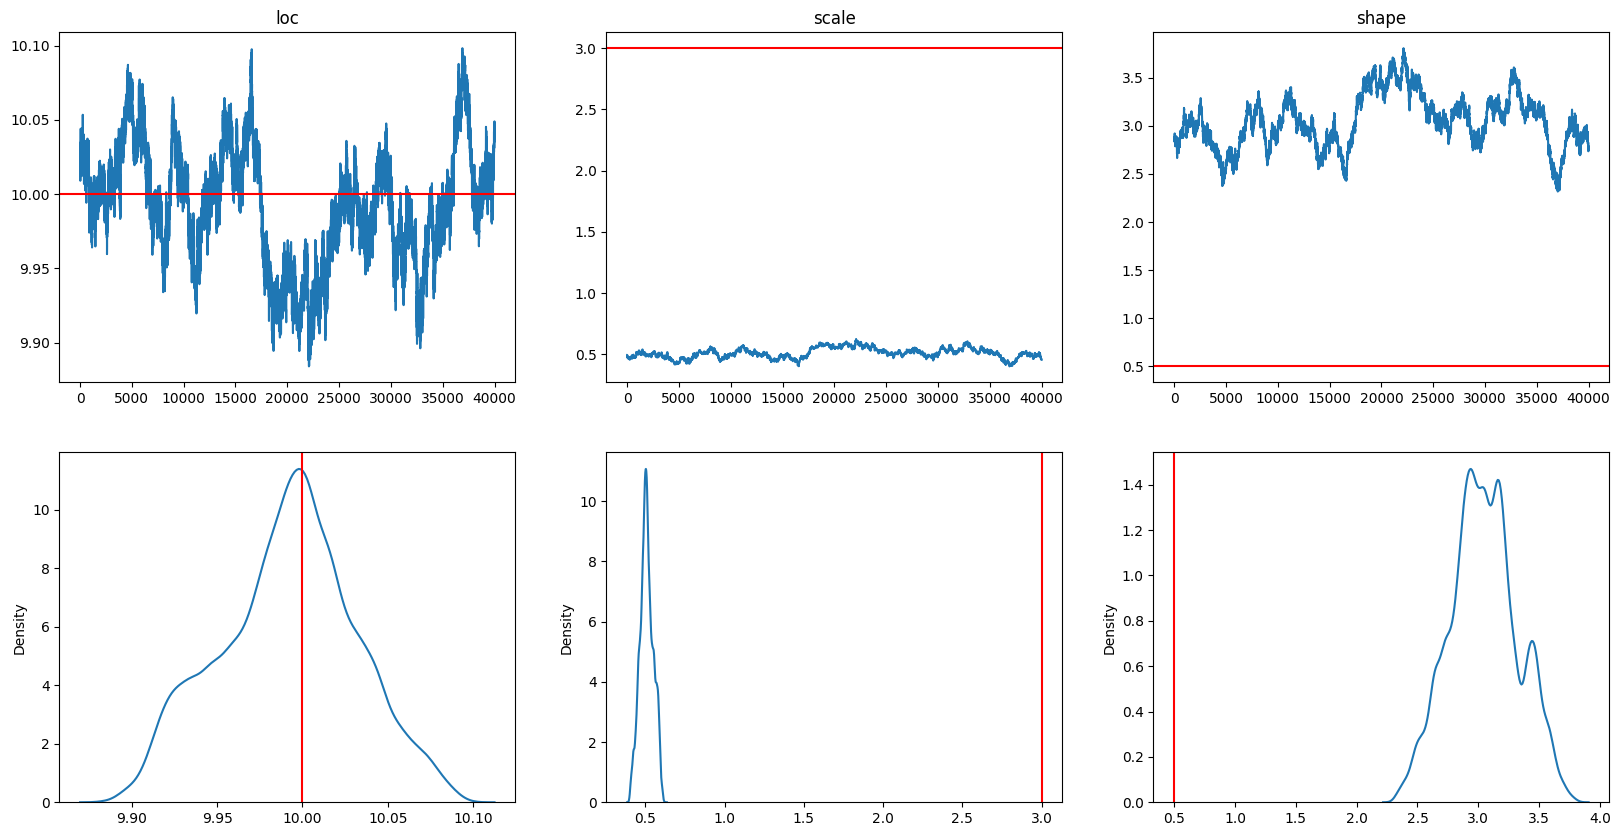

In [131]:
display(test2,burnin=10000,true_par=true_par)

In [ ]:
loc, scale, shape = 0, 1, 1
    if distribution == "normal":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (norm(loc).ppf(P[-1]) - norm(loc).ppf(P[0]))
        par_names = ["loc", "scale"]
    if distribution == "cauchy":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (cauchy(loc).ppf(P[-1]) - cauchy(loc).ppf(P[0]))
        par_names = ["loc", "scale"]
    if distribution == "TranslatedWeibull" or distribution == "weibull":
        if distribution == "weibull":
            loc = 0
            par_names = ["scale", "shape"]

        else:
            loc = 2*Q[0]-Q[1]
            par_names = ["loc", "scale", "shape"]

        shape = 1.5
        scale = (Q[-1] - Q[0]) / (
            weibull_min(shape, loc=loc).ppf(P[-1])
            - weibull_min(shape, loc=loc).ppf(P[0])
        )
    if distribution == "translated_lognormal" or distribution == "lognormal":
        if distribution == "lognormal":
            loc = 0
            par_names = ["scale", "shape"]
        else:
            loc = 2*Q[0]-Q[1]
            par_names = ["loc", "scale", "shape"]
        shape = 1
        scale = np.log(Q[len(Q) // 2])
        print("Avant reparametrization",loc,scale,shape)
        if reparametrization: scale,shape = np.exp(scale+shape**2/2)+loc,np.sqrt(np.exp(shape**2)-1)*np.exp(scale+shape**2/2)
        print("Apres reparametrization",loc,scale,shape)
    if distribution == "generalized_pareto":
        loc = Q[0]-1
        shape = 0
        scale = (Q[-1] - Q[0]) / (
            genpareto(c=shape,loc=loc).ppf(P[-1])
            - genpareto(c=shape,loc=loc).ppf(P[0]))
        print("Avant reparametrization",loc,scale,shape)
        par_names = ["loc", "scale", "shape"]
        #loc,scale,shape=1500, 500,1/10
        if reparametrization: scale,shape = loc + scale /(1-shape),scale/((1-shape)*np.sqrt(1-2*shape))
        
        print("Après reparametrization",loc,scale,shape)

    init_theta = [loc, scale, shape]
    print("In Quantile_init : init_theta = {}".format(init_theta))
    H = np.array(P) * (N - 1) + 1
    I = np.floor(H)
    G = np.round(H - I, 8)
    Q_sim = []
    Q_tot = []
    K = []
    for k in range(len(G)):
        K.append(I[k])
        if G[k] == 0:
            Q_tot.append(Q[k])
        else:
            Q_sim.append(Q[k] - epsilon)
            Q_tot.append(Q[k] - epsilon)
            Q_tot.append((Q[k] - Q_tot[-1] * (1 - G[k])) / G[k])
            K.append(I[k] + 1)
            if k < len(G) - 1:
                if Q_tot[-1] > Q[k + 1]:
                    raise Exception("Initialization problem !")
    K = np.array(K)
    K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
    X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)

    X2 = np.append(Q_tot, np.inf)
    a, b = np.repeat(X1, K1), np.repeat(X2, K1)
    #print("Before truncated : loc = {}, scale = {}, shape = {}\na = {} b = {}".format(np.unique(loc),np.unique(scale),np.unique(shape),np.unique(a),np.unique(b)))
    
    sample = truncated(
        a=a,
        b=b,
        loc=np.repeat(loc, len(a)),
        scale=np.repeat(scale, len(a)),
        size=len(a),
        distribution=distribution,
        shape=shape,
        reparametrization=reparametrization
    )

    X_0 = np.round(np.append(sample, Q_tot).reshape(-1), 8)
    return X_0, init_theta, par_names, Q_sim, Q_tot, K, I, G

IndentationError: unexpected indent (1567936839.py, line 2)